In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('telecom_cleaned.csv')

In [3]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,1,1,0,1,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,1,1,1,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,0,1,1,0,1,1,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,2,0,0,0,0,0,0,0,1,2,70.70,151.65,1


## Visualization

In [4]:
corr = df.corr()
corr

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001819,-0.001379,0.010349,0.005285,-0.007515,-0.008883,-0.009643,-0.016328,-0.013093,-0.000807,-0.008507,-0.007124,-0.010105,0.000095,-0.011902,0.016942,-0.013779,0.000048,-0.008545
SeniorCitizen,-0.001819,1.000000,0.016957,-0.210550,0.015683,0.008392,0.142996,0.259030,-0.038576,0.066663,0.059514,-0.060577,0.105445,0.119842,-0.141820,0.156258,-0.038158,0.219874,0.102411,0.150541
Partner,-0.001379,0.016957,1.000000,0.452269,0.381912,0.018397,0.142561,0.000938,0.143346,0.141849,0.153556,0.120206,0.124483,0.118108,0.294094,-0.013957,-0.156232,0.097825,0.319072,-0.149982
Dependents,0.010349,-0.210550,0.452269,1.000000,0.163386,-0.001078,-0.024307,-0.177789,0.080786,0.023639,0.013900,0.063053,-0.016499,-0.038375,0.240556,-0.110131,-0.041989,-0.112343,0.064653,-0.163128
tenure,0.005285,0.015683,0.381912,0.163386,1.000000,0.007877,0.332399,0.031272,0.328297,0.361138,0.361520,0.325288,0.280264,0.285402,0.676734,0.004823,-0.370087,0.246862,0.825880,-0.354049
PhoneService,-0.007515,0.008392,0.018397,-0.001078,0.007877,1.000000,0.279530,0.094182,-0.091676,-0.052133,-0.070076,-0.095138,-0.021383,-0.033477,0.003019,0.016696,-0.005499,0.248033,0.113008,0.011691
MultipleLines,-0.008883,0.142996,0.142561,-0.024307,0.332399,0.279530,1.000000,0.345068,0.098592,0.202228,0.201733,0.100421,0.257804,0.259194,0.107529,0.163746,-0.171240,0.490912,0.469042,0.040033
InternetService,-0.009643,0.259030,0.000938,-0.177789,0.031272,0.094182,0.345068,1.000000,0.156493,0.307223,0.313420,0.164532,0.429616,0.426820,-0.288855,0.377644,-0.119507,0.905389,0.428212,0.316350
OnlineSecurity,-0.016328,-0.038576,0.143346,0.080786,0.328297,-0.091676,0.098592,0.156493,1.000000,0.283285,0.274875,0.354458,0.175514,0.187426,0.245660,-0.004051,-0.149112,0.296447,0.412619,-0.171270
OnlineBackup,-0.013093,0.066663,0.141849,0.023639,0.361138,-0.052133,0.202228,0.307223,0.283285,1.000000,0.303058,0.293705,0.281601,0.274523,0.155262,0.127056,-0.170720,0.441529,0.510100,-0.082307


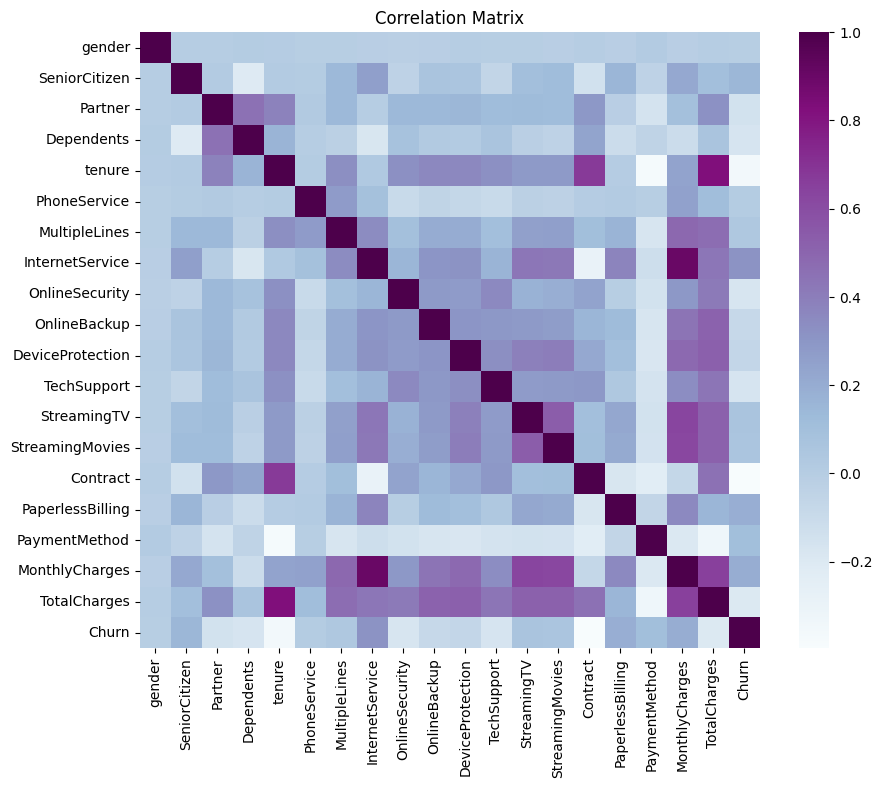

In [5]:
# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=False, cmap='BuPu')
plt.title('Correlation Matrix')
plt.show()

Churn
0    0.734215
1    0.265785
Name: proportion, dtype: float64


Text(0, 0.5, 'proportion of observations')

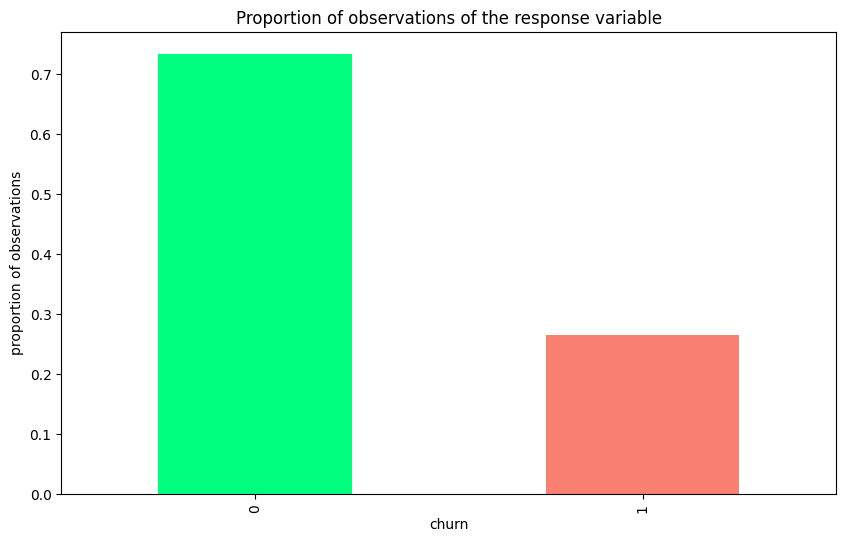

In [6]:
# Plotting the bar graph

prop_response = df['Churn'].value_counts(normalize=True)
print(prop_response)
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot()
prop_response.plot(kind='bar', ax=ax, color=['springgreen','salmon'])
ax.set_title('Proportion of observations of the response variable')
ax.set_xlabel('churn')
ax.set_ylabel('proportion of observations')

<Axes: xlabel='gender', ylabel='count'>

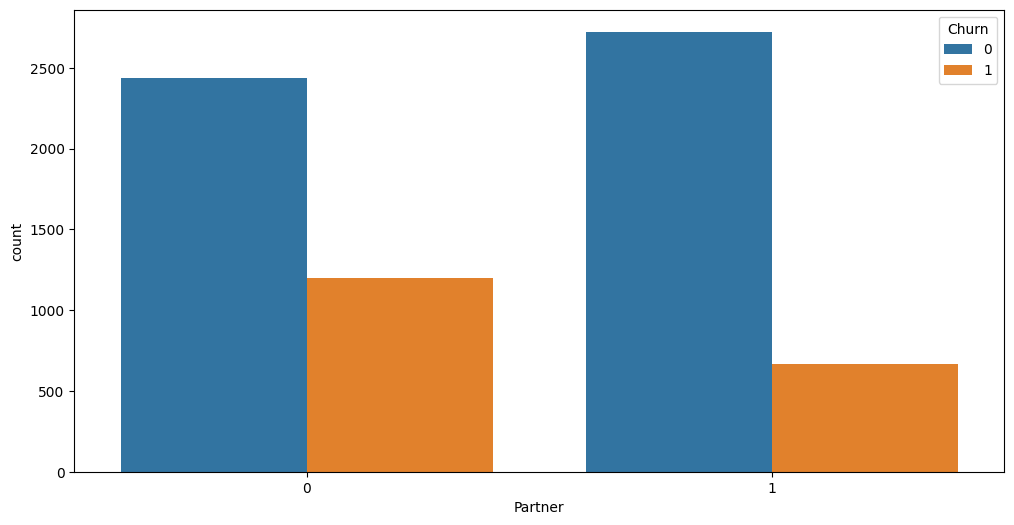

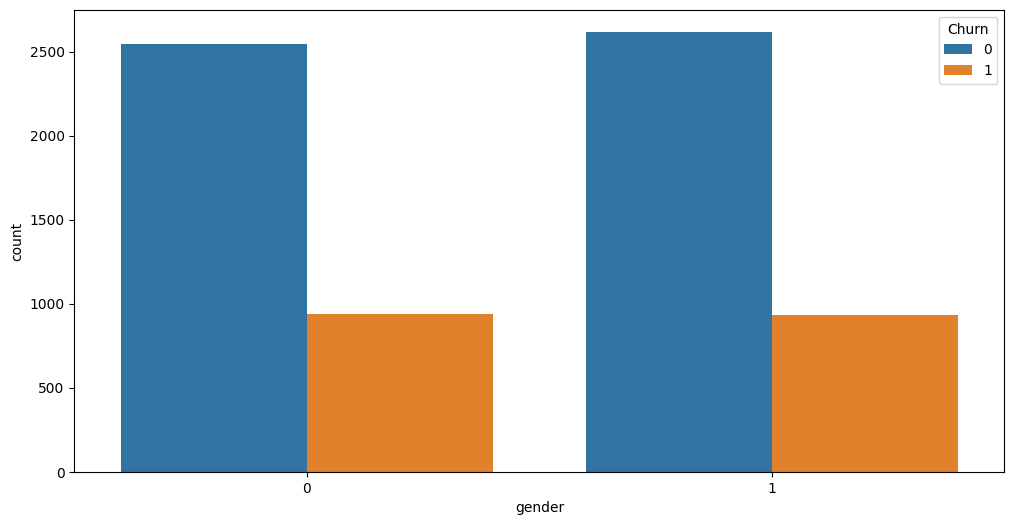

In [7]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'Partner', hue = 'Churn', data = df)

plt.figure(figsize = (12,6))
sns.countplot(x = 'gender', hue = 'Churn', data = df)

Customer with a partner is less likely to churn and there is no difference in the churning rate irrespective of gender

<Axes: xlabel='Churn', ylabel='tenure'>

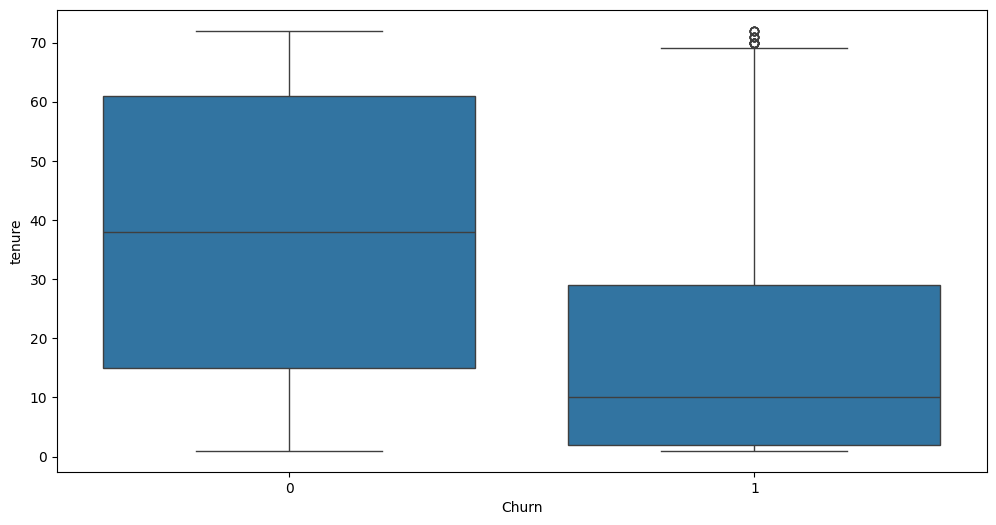

In [8]:
plt.figure(figsize = (12,6))
sns.boxplot(x = 'Churn', y ='tenure', data = df)

it can be observed that people with less tenuring are less likely to churn

<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

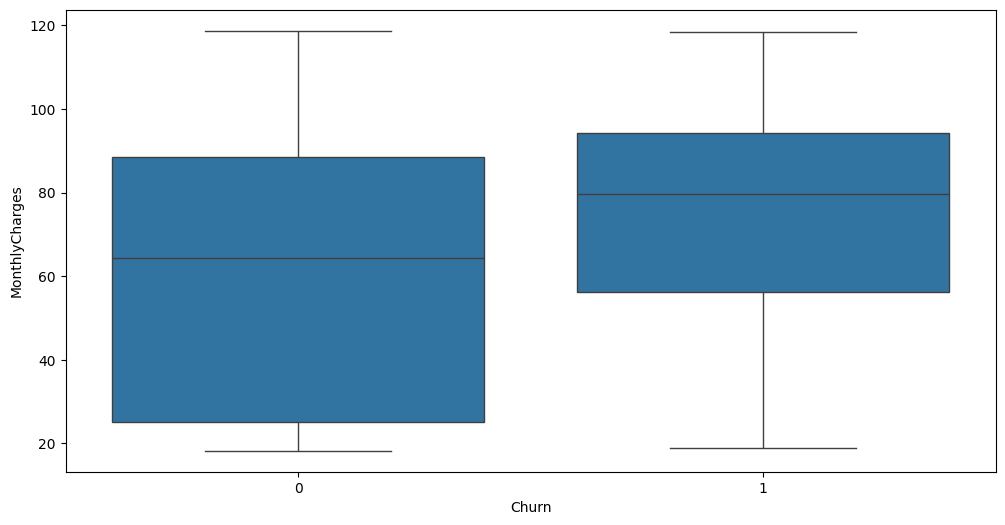

In [9]:
plt.figure(figsize = (12,6))
sns.boxplot(x = 'Churn', y ='MonthlyCharges', data = df)

we can see that people who churning are having higher monthly charges.

Text(0.5, 1.0, 'Contract Type')

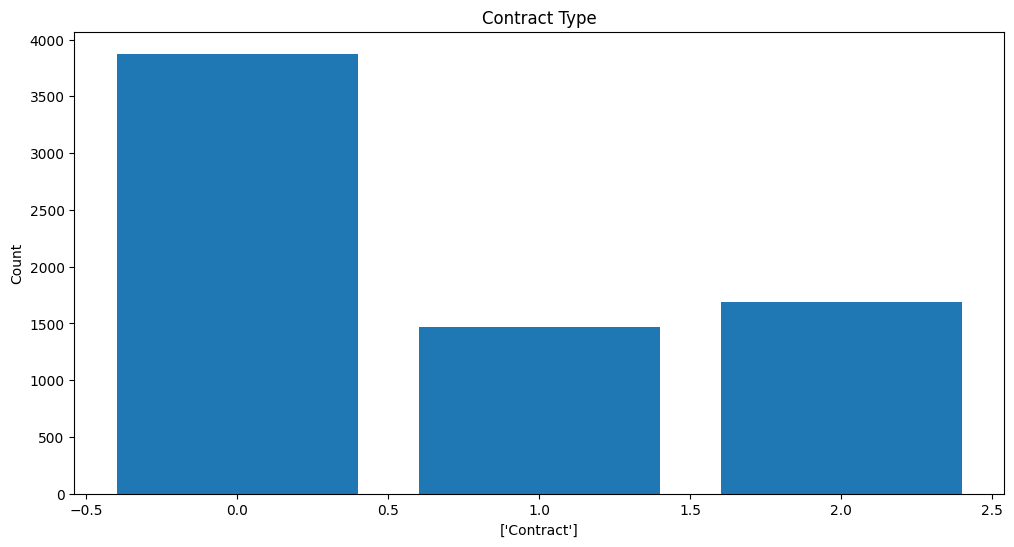

In [10]:
plt.figure(figsize = (12,6))
plt.bar( (df['Contract'].value_counts()).index, (df['Contract'].value_counts()).values)
plt.xlabel(['Contract'])
plt.ylabel('Count')
plt.title('Contract Type')